# Install

In [1]:
#! pip install scipy

# Set Up GPU

In [2]:
import tensorflow as tf

In [3]:
gpus = tf.config.list_physical_devices("GPU")

if gpus:
    for gpu in gpus:
        print("Found a GPU with the name: ", gpu)
else:
    print("Not found")

Found a GPU with the name:  PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [4]:
import os

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Library

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import os
from PIL import Image
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy

# Directories

In [7]:
BASE_DIR = r'E:\Desktop\Recognition Model\Plant Leaf Dataset 3'

valid_dir = os.path.join(BASE_DIR, 'valid')
train_dir = os.path.join(BASE_DIR, 'train')

train_class_dir = [os.path.join(train_dir, d) for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
valid_class_dir = [os.path.join(valid_dir, d) for d in os.listdir(valid_dir) if os.path.isdir(os.path.join(valid_dir, d))]

train_image_paths = []
valid_image_paths = []

for class_dir in train_class_dir:
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.JPG','.jpg','jpeg')):
            image_path = os.path.join(class_dir, file_name)
            train_image_paths.append(image_path)

for class_dir in valid_class_dir:
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.JPG','.jpg','jpeg')):
            image_path = os.path.join(class_dir, file_name)
            train_image_paths.append(image_path)


train_labels = [os.path.basename(class_dir) for class_dir in train_class_dir]
valid_labels = [os.path.basename(class_dir) for class_dir in valid_class_dir]

classes_train = os.listdir(train_dir)

classes_train

['Early_blight', 'healthy', 'Late_blight']

# Data Preprocessing

In [8]:
target_size = (100,100)

batch_size = 64


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)


validation_generator = val_datagen.flow_from_directory(
    valid_dir,
    target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 10201 images belonging to 3 classes.
Found 1686 images belonging to 3 classes.


In [9]:
train_generator.class_indices

{'Early_blight': 0, 'Late_blight': 1, 'healthy': 2}

In [10]:
class_directories = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
num_classes = len(class_directories)
num_classes

3

# Build CNN

In [11]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0

# Trainning

In [14]:
num_epochs = 15
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
)

Epoch 1/15
160/160 [==============================] - 58s 321ms/step - loss: 1.0527 - accuracy: 0.4163 - val_loss: 0.8734 - val_accuracy: 0.5380
Epoch 2/15
160/160 [==============================] - 30s 185ms/step - loss: 0.7602 - accuracy: 0.6614 - val_loss: 0.4082 - val_accuracy: 0.8458
Epoch 3/15
160/160 [==============================] - 30s 184ms/step - loss: 0.5309 - accuracy: 0.7859 - val_loss: 0.1960 - val_accuracy: 0.9395
Epoch 4/15
160/160 [==============================] - 30s 183ms/step - loss: 0.3309 - accuracy: 0.8717 - val_loss: 0.1622 - val_accuracy: 0.9442
Epoch 5/15
160/160 [==============================] - 30s 184ms/step - loss: 0.2541 - accuracy: 0.9078 - val_loss: 0.1101 - val_accuracy: 0.9591
Epoch 6/15
160/160 [==============================] - 30s 184ms/step - loss: 0.2265 - accuracy: 0.9190 - val_loss: 0.1503 - val_accuracy: 0.9448
Epoch 7/15
160/160 [==============================] - 30s 184ms/step - loss: 0.1871 - accuracy: 0.9347 - val_loss: 0.0611 - val_ac

# Evaluation

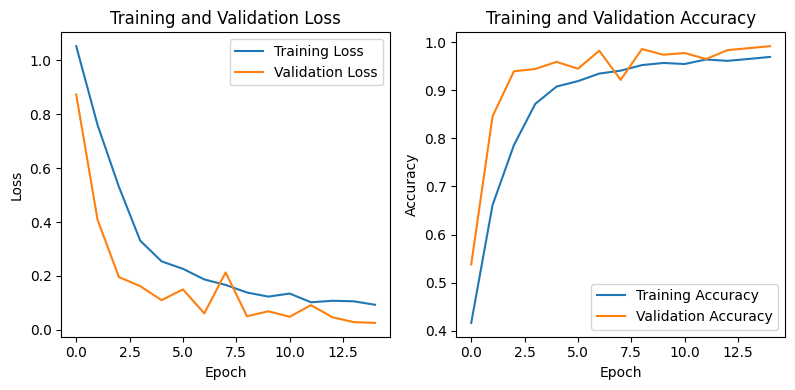

In [15]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()




plt.tight_layout()
plt.show()

# Save Model

In [16]:
model.save("E:\Desktop\Recognition Model\Potato Model 3")

INFO:tensorflow:Assets written to: E:\Desktop\Recognition Model\Potato Model 3\assets


INFO:tensorflow:Assets written to: E:\Desktop\Recognition Model\Potato Model 3\assets
